In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors

Welcome to JupyROOT 6.16/00


Get values from text files which have the frquentist study results

EB comments

In [2]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_flux=[]
with open("cov_fluxxsec_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_flux.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


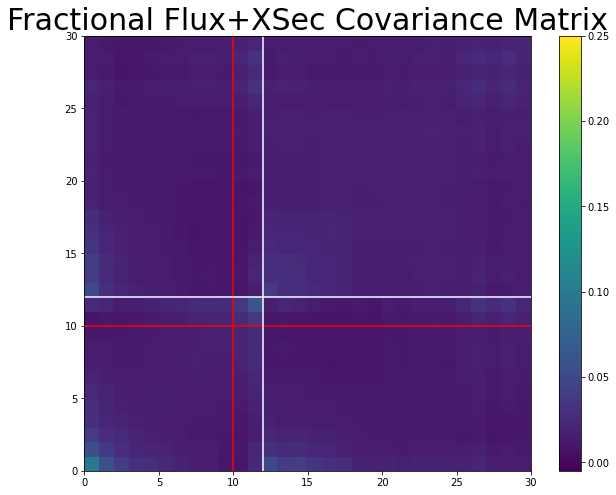

In [3]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_flux,norm=colors.Normalize(vmin=-.005, vmax=.25))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional Flux+XSec Covariance Matrix",fontsize=30)
plt.show()
plt.close()


In [4]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_flux=[]
with open("cov_flux_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_flux.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


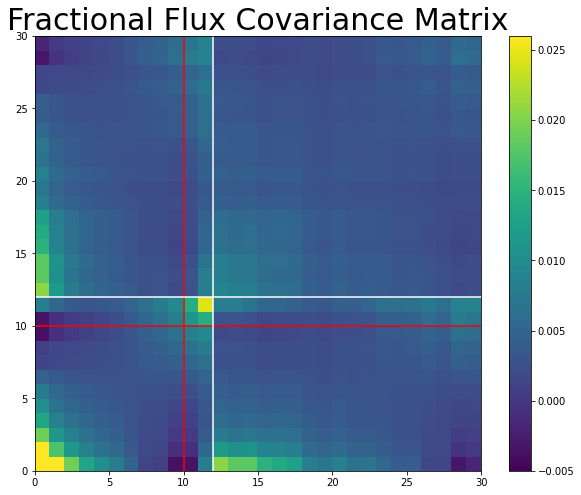

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


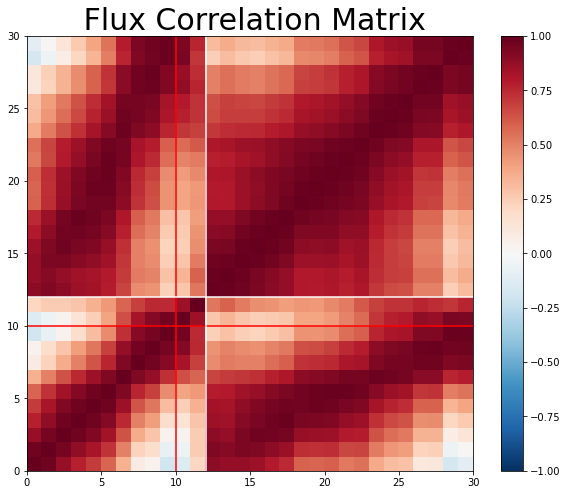

In [5]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_flux,norm=colors.Normalize(vmin=-.005, vmax=.026))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional Flux Covariance Matrix",fontsize=30)
plt.show()
plt.close()

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_flux[i][j]/(math.sqrt(cov_flux[i][i])*math.sqrt(cov_flux[j][j]))
            
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" Flux Correlation Matrix",fontsize=30)
plt.show()
plt.close()

In [6]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_reint=[]
with open("cov_reint_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_reint.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


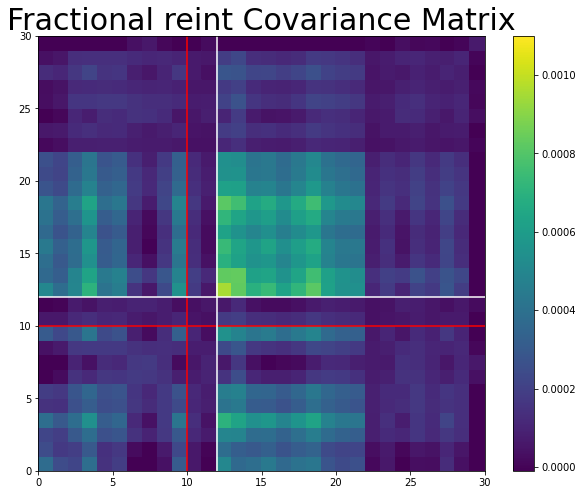

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


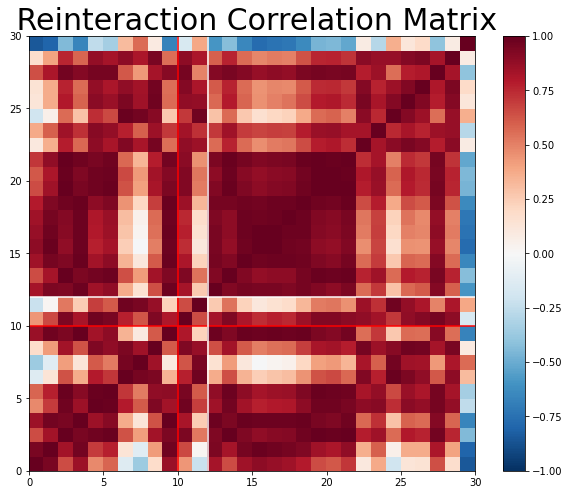

In [7]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_reint,norm=colors.Normalize(vmin=-.00001, vmax=.0011))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional reint Covariance Matrix",fontsize=30)
plt.show()
plt.close()

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_reint[i][j]/(math.sqrt(cov_reint[i][i])*math.sqrt(cov_reint[j][j]))
            
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" Reinteraction Correlation Matrix",fontsize=30)
plt.show()
plt.close()


In [8]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_xsec=[]
with open("cov_xsec_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_xsec.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


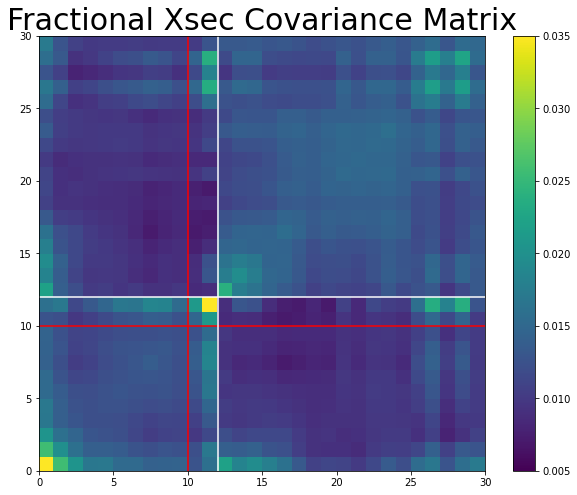

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


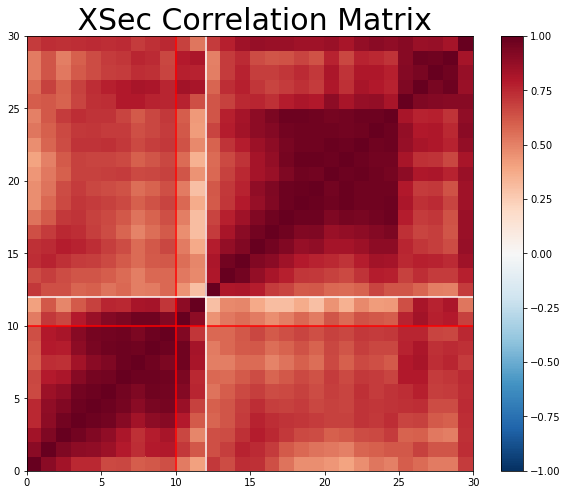

In [9]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_xsec,norm=colors.Normalize(vmin=.005, vmax=.035))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional Xsec Covariance Matrix",fontsize=30)
plt.show()
plt.close()


corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_xsec[i][j]/(math.sqrt(cov_xsec[i][i])*math.sqrt(cov_xsec[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" XSec Correlation Matrix",fontsize=30)
plt.show()
plt.close()

In [10]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_det=[]
with open("cov_det_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_det.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


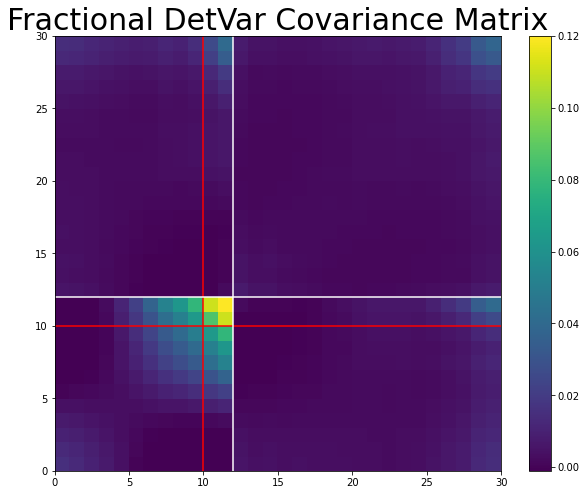

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


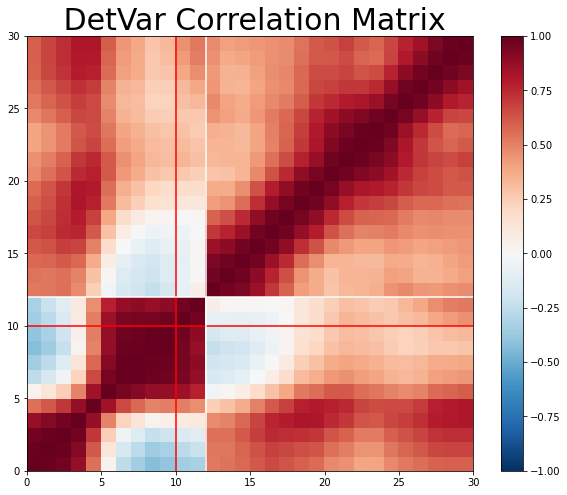

In [11]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_det,norm=colors.Normalize(vmin=-.001, vmax=.12))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional DetVar Covariance Matrix",fontsize=30)
plt.show()
plt.close()


corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_det[i][j]/(math.sqrt(cov_det[i][i])*math.sqrt(cov_det[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" DetVar Correlation Matrix",fontsize=30)
plt.show()
plt.close()

In [12]:
# detvar only
cov=[]
with open("covMat_Enu_Tot_bigbin.csv","r") as chis:
    lines = chis.readlines()
    for i in range(nbins+1):       
        lines[i].strip()
        vals0 = lines[i].split(",")
        val_list= []
        for v in range(len(vals0)):
            val_list.append(float(vals0[v]))
        cov.append(val_list)
# rearrange to match binning
print(len(cov))
in_offset_m = 1
in_offset_e = in_offset_m + nbinsmu
print(in_offset_e)
detsys_covar_ee = []
for i in range(nbinse):
    detsys_covar_ee.append( [] )
    for j in range(nbinse):
        detsys_covar_ee[i].append( cov[in_offset_e+i][in_offset_e+j] )
detsys_covar_em = []
for i in range(nbinse):
    detsys_covar_em.append( [] )
    for j in range(nbinsmu):
        detsys_covar_em[i].append( cov[in_offset_e+i][in_offset_m+j] )
detsys_covar_mm = []
for i in range(nbinsmu):
    detsys_covar_mm.append( [] )
    for j in range(nbinsmu):
        detsys_covar_mm[i].append( cov[in_offset_m+i][in_offset_m+j] )
        
newcov=np.zeros((31,31))
for i in range(nbinse):
    for j in range(nbinse):
        newcov[i][j]=detsys_covar_ee[i][j]
for i in range(nbinsmu):
    for j in range(nbinsmu):
        newcov[i+nbinse][j+nbinse]=detsys_covar_mm[i][j]
print(len(detsys_covar_em))
for i in range(nbinse):
    for j in range(nbinsmu):
        newcov[i][nbinse+j] += detsys_covar_em[i][j]
        newcov[nbinse+j][i] += detsys_covar_em[i][j]


32
20
12


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


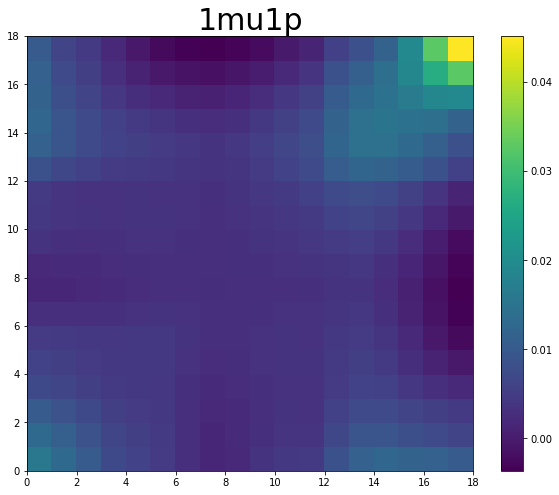

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


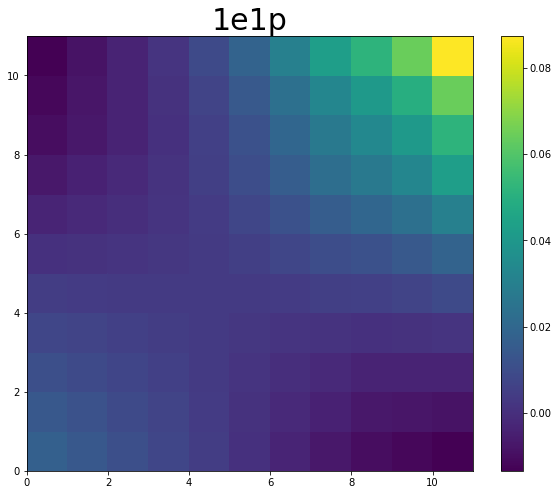

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


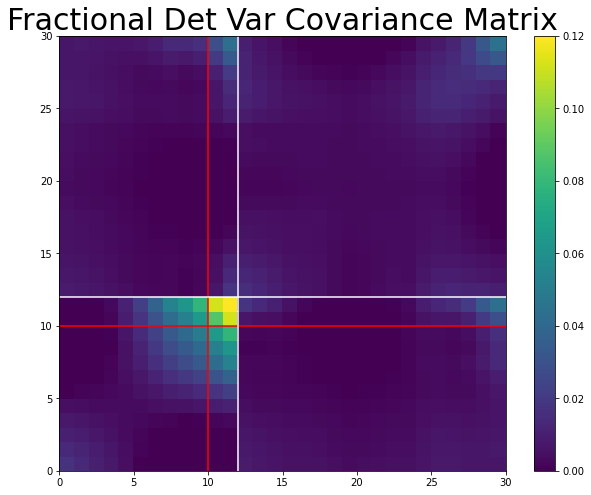

/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


0.12615037152586717
0.1042882685562017
0.08445555532233458
0.06770403184016316
0.0657970794641298
0.0651245974747883
0.057270392281803
0.052806843015287756
0.05521704178415409
0.05933188974597727
0.06397505372208959
0.075264261013586
0.10318388463184995
0.12002224416347636
0.12310386383023039
0.12889647208166347
0.16361308731108998
0.21254760482893575
0.23811912963128684


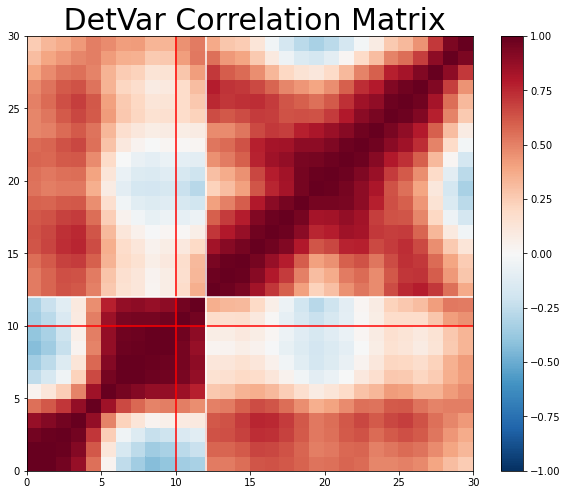

In [13]:
binsliste=[i for i in range(nbinse)]
binslistmu=[i for i in range(nbinsmu)]

y,x = np.meshgrid(binslistmu, binslistmu)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, detsys_covar_mm)
cbar = plt.colorbar()
plt.title("1mu1p",fontsize=30)
plt.show()
plt.close()

y,x = np.meshgrid(binsliste, binsliste)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, detsys_covar_ee)
cbar = plt.colorbar()
plt.title("1e1p",fontsize=30)
plt.show()
plt.close()

binslist=[i for i in range(nbins)]
y,x = np.meshgrid(binslist, binslist)
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y,newcov,norm=colors.Normalize(vmin=0, vmax=.12))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional Det Var Covariance Matrix",fontsize=30)
plt.show()
plt.close()

for i in range(nbinsmu):
    print(math.sqrt(newcov[i+nbinse][i+nbinse]))

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] =newcov[i][j]/(math.sqrt(newcov[i][i])*math.sqrt(newcov[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" DetVar Correlation Matrix",fontsize=30)
plt.show()
plt.close()

In [14]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_stat=[]
with open("cov_stat_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_stat.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


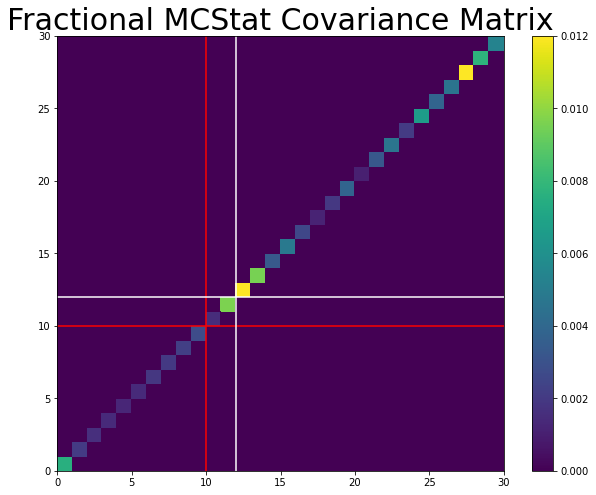

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


0.004092807498744249


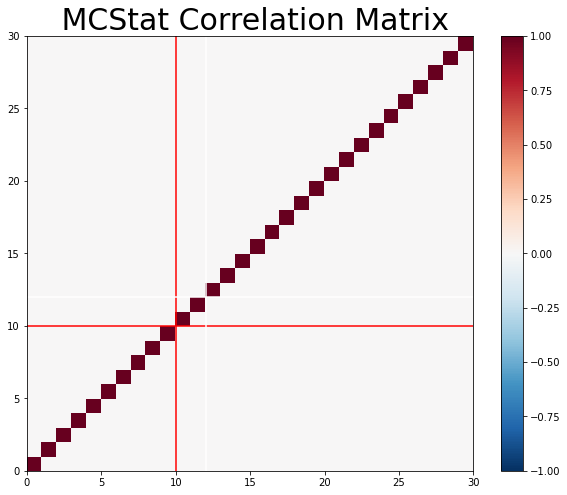

In [15]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_stat,norm=colors.Normalize(vmin=0, vmax=0.012))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional MCStat Covariance Matrix",fontsize=30)
plt.show()
plt.close()
print(cov[11][11])

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_stat[i][j]/(math.sqrt(cov_stat[i][i])*math.sqrt(cov_stat[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" MCStat Correlation Matrix",fontsize=30)
plt.show()
plt.close()

In [16]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_full=[]
with open("cov_tot_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
        i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_full.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


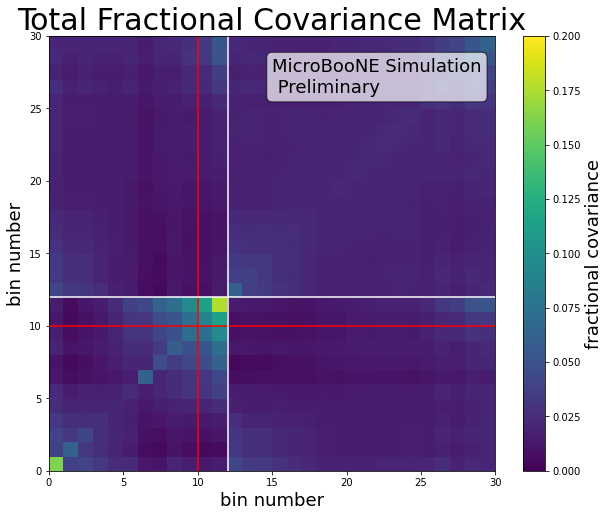

/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


0.004092807498744249


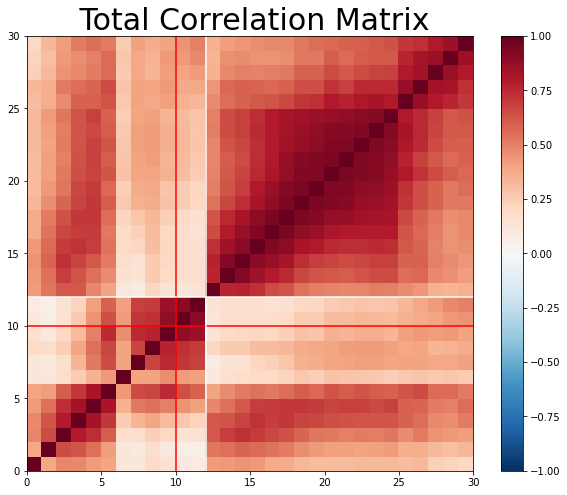

In [17]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_full,norm=colors.Normalize(vmin=0, vmax=0.2))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Total Fractional Covariance Matrix",fontsize=30)
plt.xlabel('bin number',fontsize=18)
plt.ylabel('bin number',fontsize=18)
cbar.set_label(r'fractional covariance',rotation=90,fontsize=18)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.5, 0.95, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.show()
plt.close()
print(cov[11][11])

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_full[i][j]/(math.sqrt(cov_full[i][i])*math.sqrt(cov_full[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" Total Correlation Matrix",fontsize=30)
plt.show()
plt.close()

In [16]:
#  make 1d uncertainty plot - based of Joshscode

covNames = \
["Flux   ",
"XSec   ",
"ReInter",
"DetSys ",
"MCStat ",
"Tot "]

covMats  = \
[cov_flux,
cov_xsec,
cov_reint,
newcov,
cov_stat,
cov_full]

# Null Spectra
trueSpec_l = \
[[1.52238 ,2.94035,3.42772,2.89943,2.99374,2.94102,3.91397,2.36921,2.63266,2.4014,5.79405,1.96198,30.1331,189.923,274.224,370.417,339.711,411.591,435.688,406.611,366.718,328.628,309.213,261.256,216.865,187.686,149.334,113.56,89.0788,71.5906,62.9219]]
fnormsquared = []



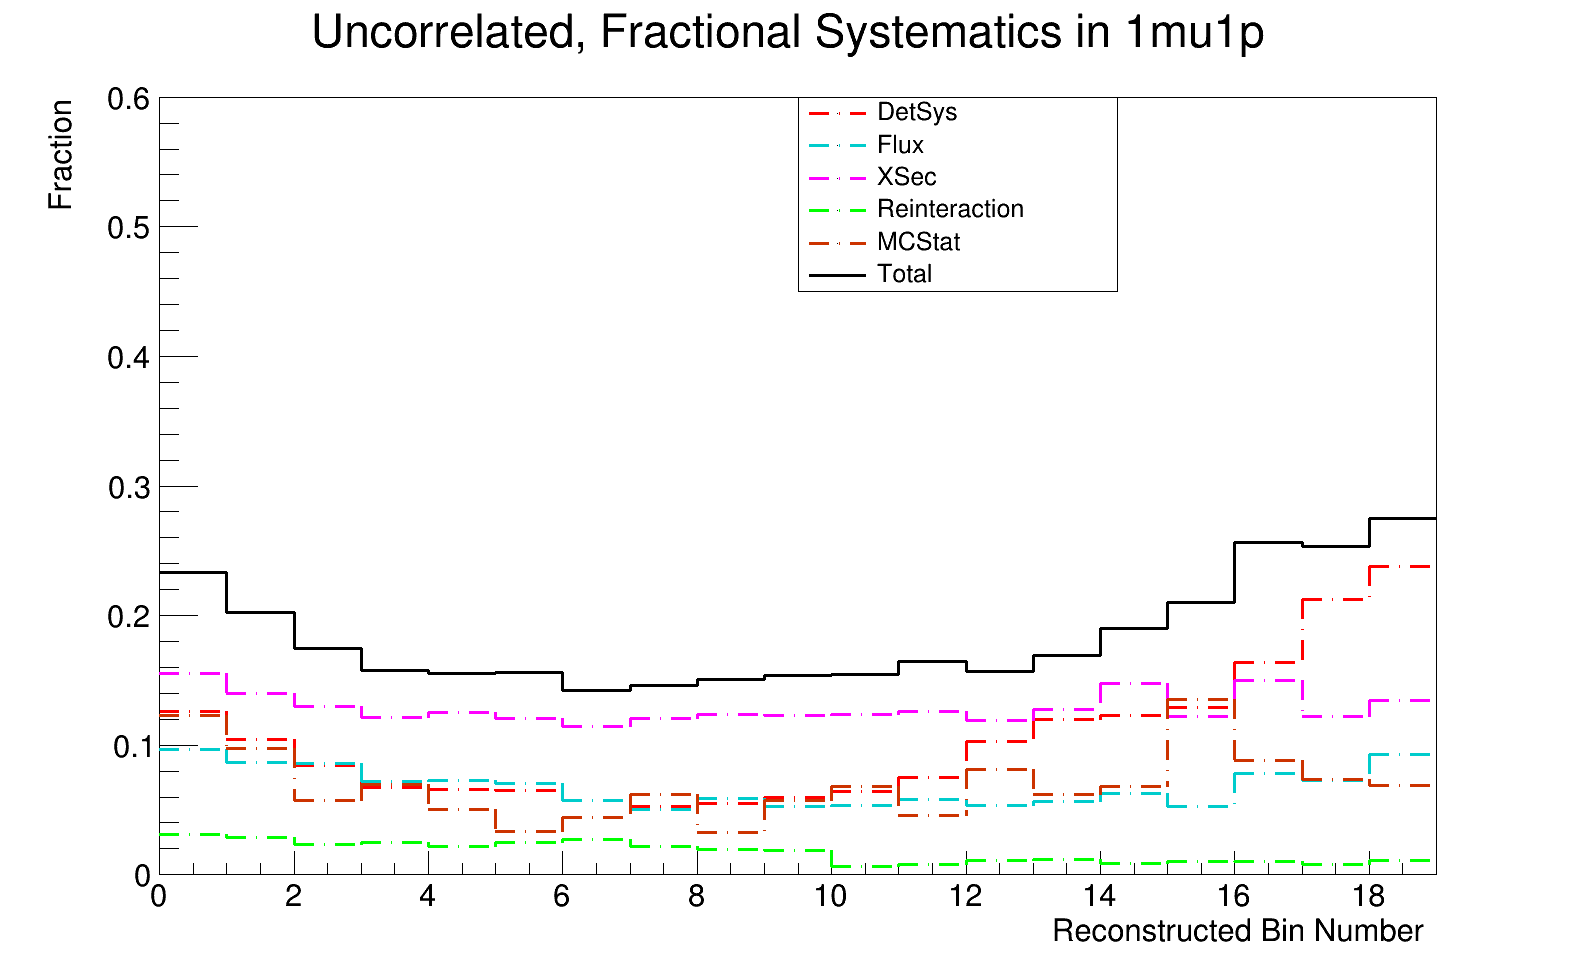

In [17]:
# Create uncorrelated systematics plot
ROOT.gStyle.SetOptStat(0)
hist_names = ['DetSys','Flux','XSec','Reinteraction','MCStat','Total']
colors     =[ROOT.kRed,ROOT.kCyan+1,ROOT.kMagenta,ROOT.kGreen,ROOT.kOrange+9,ROOT.kBlack]
styles     =[10,10,10,10,10,1]
hist_v = [ROOT.TH1D(hist_names[i],hist_names[i],nbinsmu,0,nbinsmu) for i in range(len(hist_names))]
covs_v     = [newcov,cov_flux,cov_xsec,cov_reint,cov_stat,cov_full]
# hist_names = ['DetSys']
# colors     =[ROOT.kRed]
# styles     =[1]
# hist_v = [ROOT.TH1D(hist_names[i],hist_names[i],nbinsmu,250,1200) for i in range(len(hist_names))]
# covs_v     = [newcov]
max_val = 0
for i in range(len(hist_v)):
    for b in range(nbinsmu):
        hist_v[i].SetBinContent(b+1,np.sqrt(covs_v[i][b+nbinse][b+nbinse]))
        if np.sqrt(covs_v[i][b+nbinse][b+nbinse]) > max_val:
            max_val = np.sqrt(covs_v[i][b+nbinse][b+nbinse])
canv = ROOT.TCanvas("Uncorrelated Systematics","Uncorrelated Systematics",1600,1000)
hist_v[0].SetMaximum(max_val*1.1)
hist_v[0].SetLineColor(colors[0])
hist_v[0].SetLineStyle(10)
hist_v[0].SetLineWidth(3)
hist_v[0].Draw()
hist_v[0].SetTitle("Uncorrelated, Fractional Systematics in 1mu1p")
hist_v[0].SetXTitle("Reconstructed Bin Number")
hist_v[0].SetYTitle("Fraction")
hist_v[0].GetYaxis().SetRangeUser(0., .6)
for i in range(1,len(hist_v)):
    hist_v[i].SetLineColor(colors[i])
    hist_v[i].SetLineWidth(3)
    hist_v[i].SetLineStyle(styles[i])
    hist_v[i].Draw("SAME")
legend = ROOT.TLegend(0.5,0.7,0.7,0.9)
for i in range(len(hist_names)):
    legend.AddEntry(hist_v[i],hist_names[i])
legend.Draw()
canv.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: DetSys (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Flux (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: XSec (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Reinteraction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MCStat (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Total (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Uncorrelated Systematics


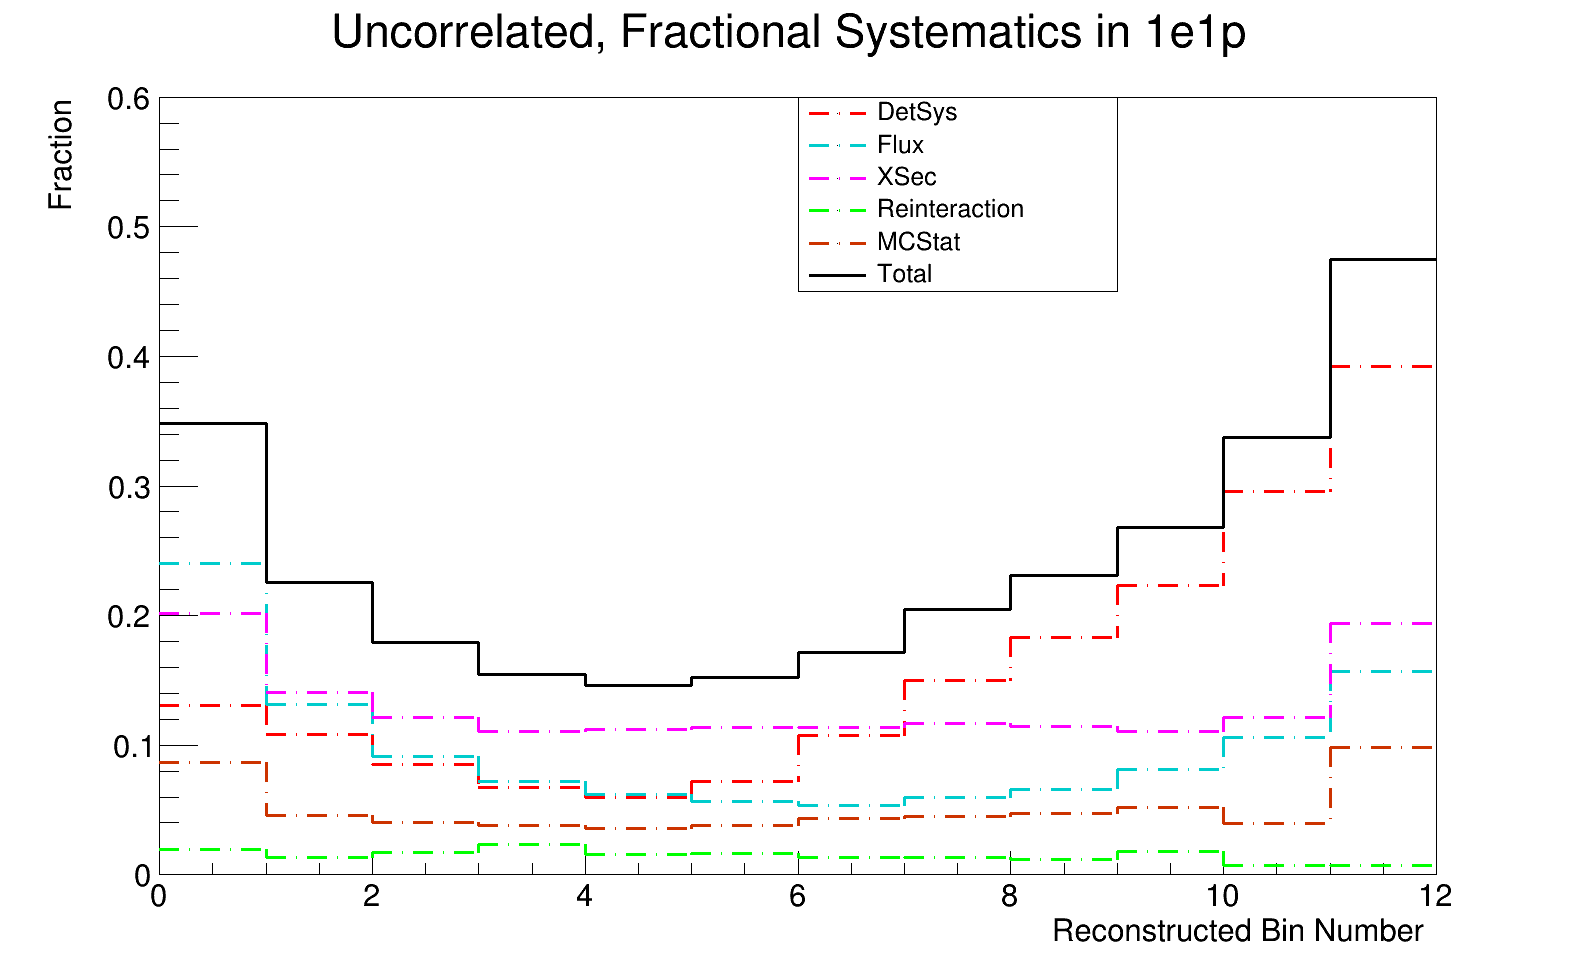

In [18]:
# Create uncorrelated systematics plot
ROOT.gStyle.SetOptStat(0)
hist_names = ['DetSys','Flux','XSec','Reinteraction','MCStat','Total']
colors     =[ROOT.kRed,ROOT.kCyan+1,ROOT.kMagenta,ROOT.kGreen,ROOT.kOrange+9,ROOT.kBlack]
styles     =[10,10,10,10,10,1]
hist_v = [ROOT.TH1D(hist_names[i],hist_names[i],nbinse,0,nbinse) for i in range(len(hist_names))]
covs_v     = [newcov,cov_flux,cov_xsec,cov_reint,cov_stat,cov_full]
max_val = 0
for i in range(len(hist_v)):
    for b in range(nbinse):
        hist_v[i].SetBinContent(b+1,np.sqrt(covs_v[i][b][b]))
        if np.sqrt(covs_v[i][b][b]) > max_val:
            max_val = np.sqrt(covs_v[i][b][b])
canv = ROOT.TCanvas("Uncorrelated Systematics","Uncorrelated Systematics",1600,1000)
hist_v[0].SetMaximum(max_val*1.1)
hist_v[0].SetLineColor(colors[0])
hist_v[0].SetLineStyle(10)
hist_v[0].SetLineWidth(3)
hist_v[0].Draw()
hist_v[0].SetTitle("Uncorrelated, Fractional Systematics in 1e1p")
hist_v[0].SetXTitle("Reconstructed Bin Number")
hist_v[0].SetYTitle("Fraction")
hist_v[0].GetYaxis().SetRangeUser(0., .6)
for i in range(1,len(hist_v)):
    hist_v[i].SetLineColor(colors[i])
    hist_v[i].SetLineWidth(3)
    hist_v[i].SetLineStyle(styles[i])
    hist_v[i].Draw("SAME")
legend = ROOT.TLegend(0.5,0.7,0.7,0.9)
for i in range(len(hist_names)):
    legend.AddEntry(hist_v[i],hist_names[i])
legend.Draw()
canv.Draw()